# Overlaying sigs from Mulder et al. (Florent) paper - presented at DC2024, photo from Sreekumar

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
# read in data
data_DC = sc.read_h5ad('20250617_AllDC_bbknn.h5ad')
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [3]:
data_DC2 = sc.read_h5ad('20250629_DC2_bbknn_clustered2.h5ad') 

In [5]:
# Set colours for NR_annotations_simple plot:
data_DC.uns["NR_annotations_simple_colors"] = ['#e377c2', '#aa40fc', '#8c564b']  

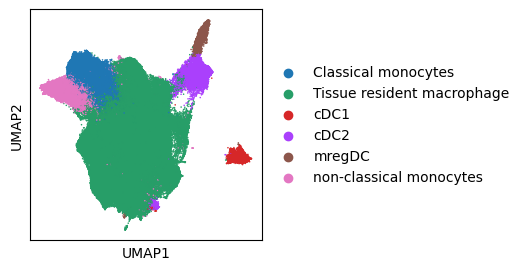

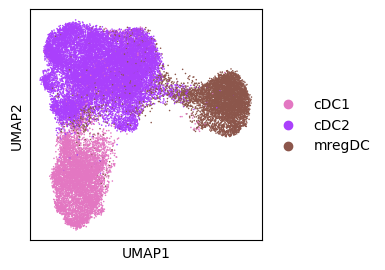

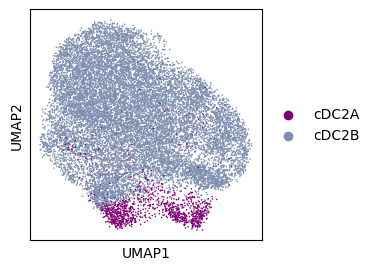

In [10]:
#export high res umap
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color="MyeloidAPC_Subsets", size=5, title="")
    sc.pl.umap(data_DC, color="NR_annotations_simple", size=5, title="")
    sc.pl.umap(data_DC2, color="cDC2_A-B", size=5, title="")

### Overlay sigs

In [11]:
CCR7_mDC = ['BIRC3','CCR7','FSCN1','CCL19','LAMP3']
LTB_DC = ['LTB','LST1','CD1A','IL18']
CD207_DC = ['CD1A','CD207','HLA-DQB2','TNF','CD59','CCR6']
DC1 = ['CLEC9A','XCR1','IRF8','WDFY4','CADM1']
preDC = ['SIGLEC6','CD5','LILRA4','CXCR3','TCF4']
IL1B_DC = ['AREG','IL1B','CCL17','CXCL8','NFKIA','NFKB1']
Prolif_DC = ['PCNA','TUBA1','HMGB1','TOP2A','MKI67']
DC2 = ['FCER1A','CD1C','CD1D','CD1E','CLEC4A']
ISG_DC = ['ISG15','IFI6','IFI44L','IFIT3']
DC3 = ['CD14','MAFB','FCGR2A','TREM2','CD163']

In [12]:
# Define dictionary of gene sets
gene_sets = {
    "CCR7_mDC": CCR7_mDC,
    "LTB_DC": LTB_DC,
    "CD207_DC": CD207_DC,
    "DC1": DC1,
    "preDC": preDC,
    "IL1B_DC": IL1B_DC,
    "Prolif_DC": Prolif_DC,
    "DC2": DC2,
    "ISG_DC": ISG_DC,
    "DC3": DC3
}

In [13]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [14]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC, genes, score_name=name)

In [15]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [18]:
colour_vars_1 = ["CCR7_mDC","LTB_DC","CD207_DC","DC1","preDC","IL1B_DC","Prolif_DC","DC2","ISG_DC","DC3","MyeloidAPC_Subsets"]
colour_vars_2 = ["CCR7_mDC","LTB_DC","CD207_DC","DC1","preDC","IL1B_DC","Prolif_DC","DC2","ISG_DC","DC3","NR_annotations_simple"]
colour_vars_3 = ["CCR7_mDC","LTB_DC","CD207_DC","DC1","preDC","IL1B_DC","Prolif_DC","DC2","ISG_DC","DC3","cDC2_A-B"]

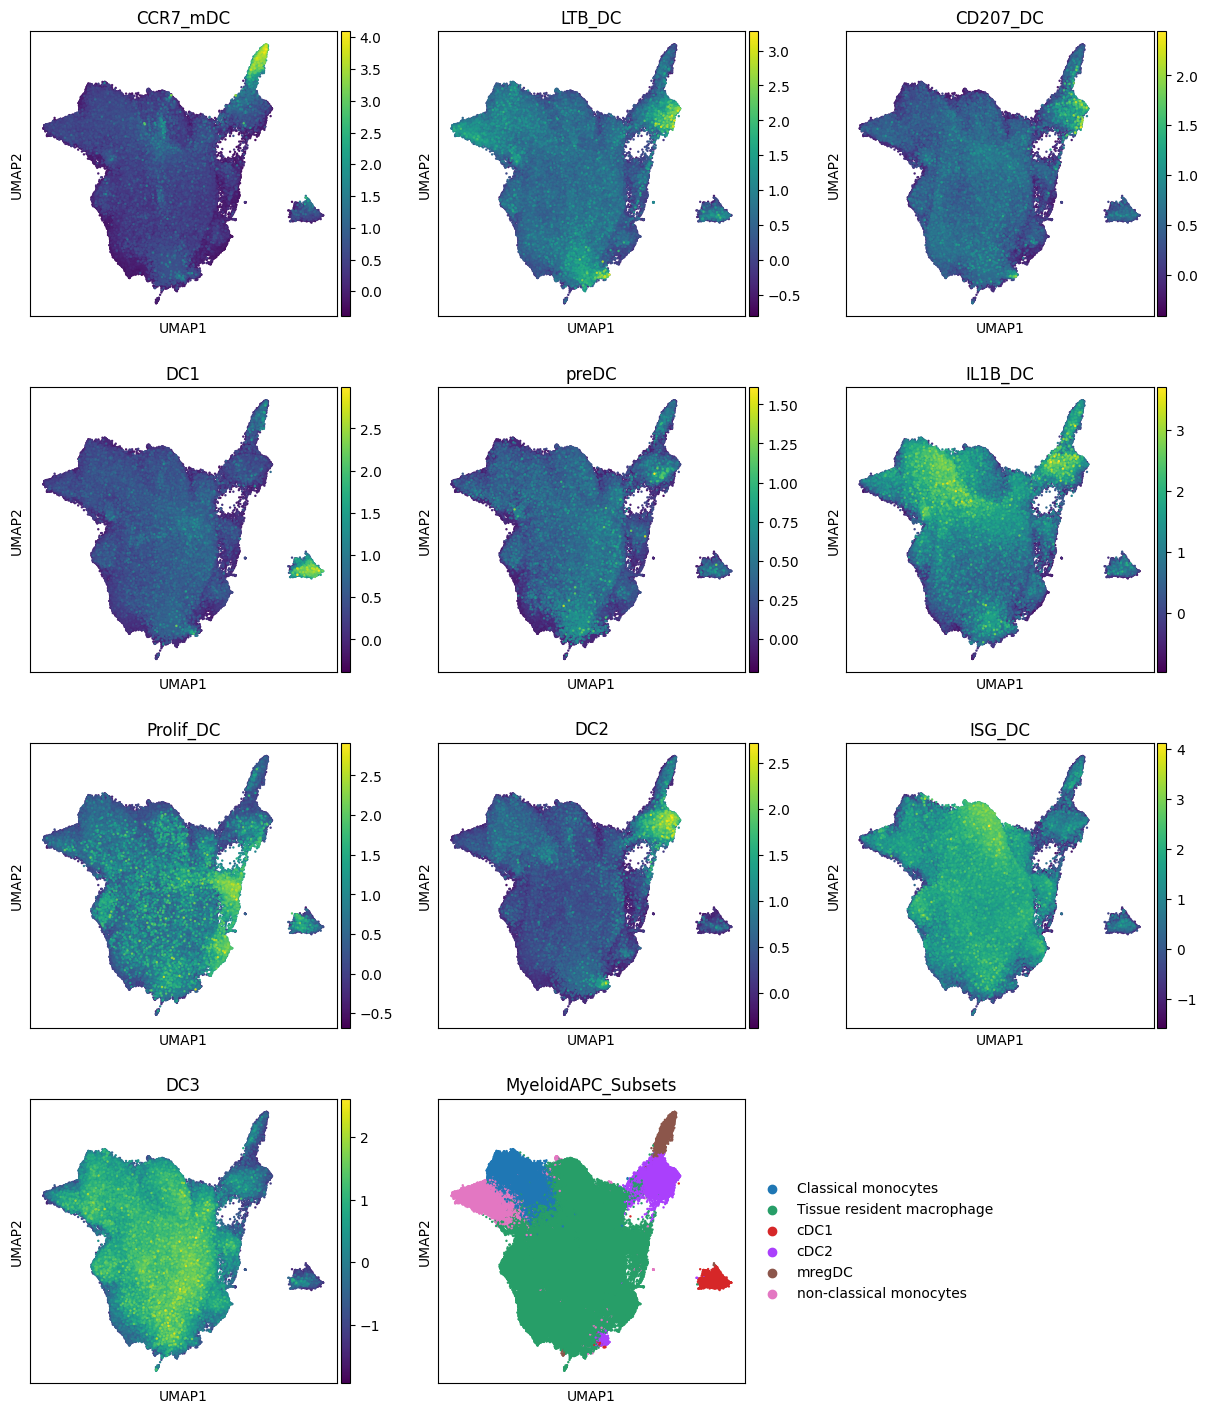

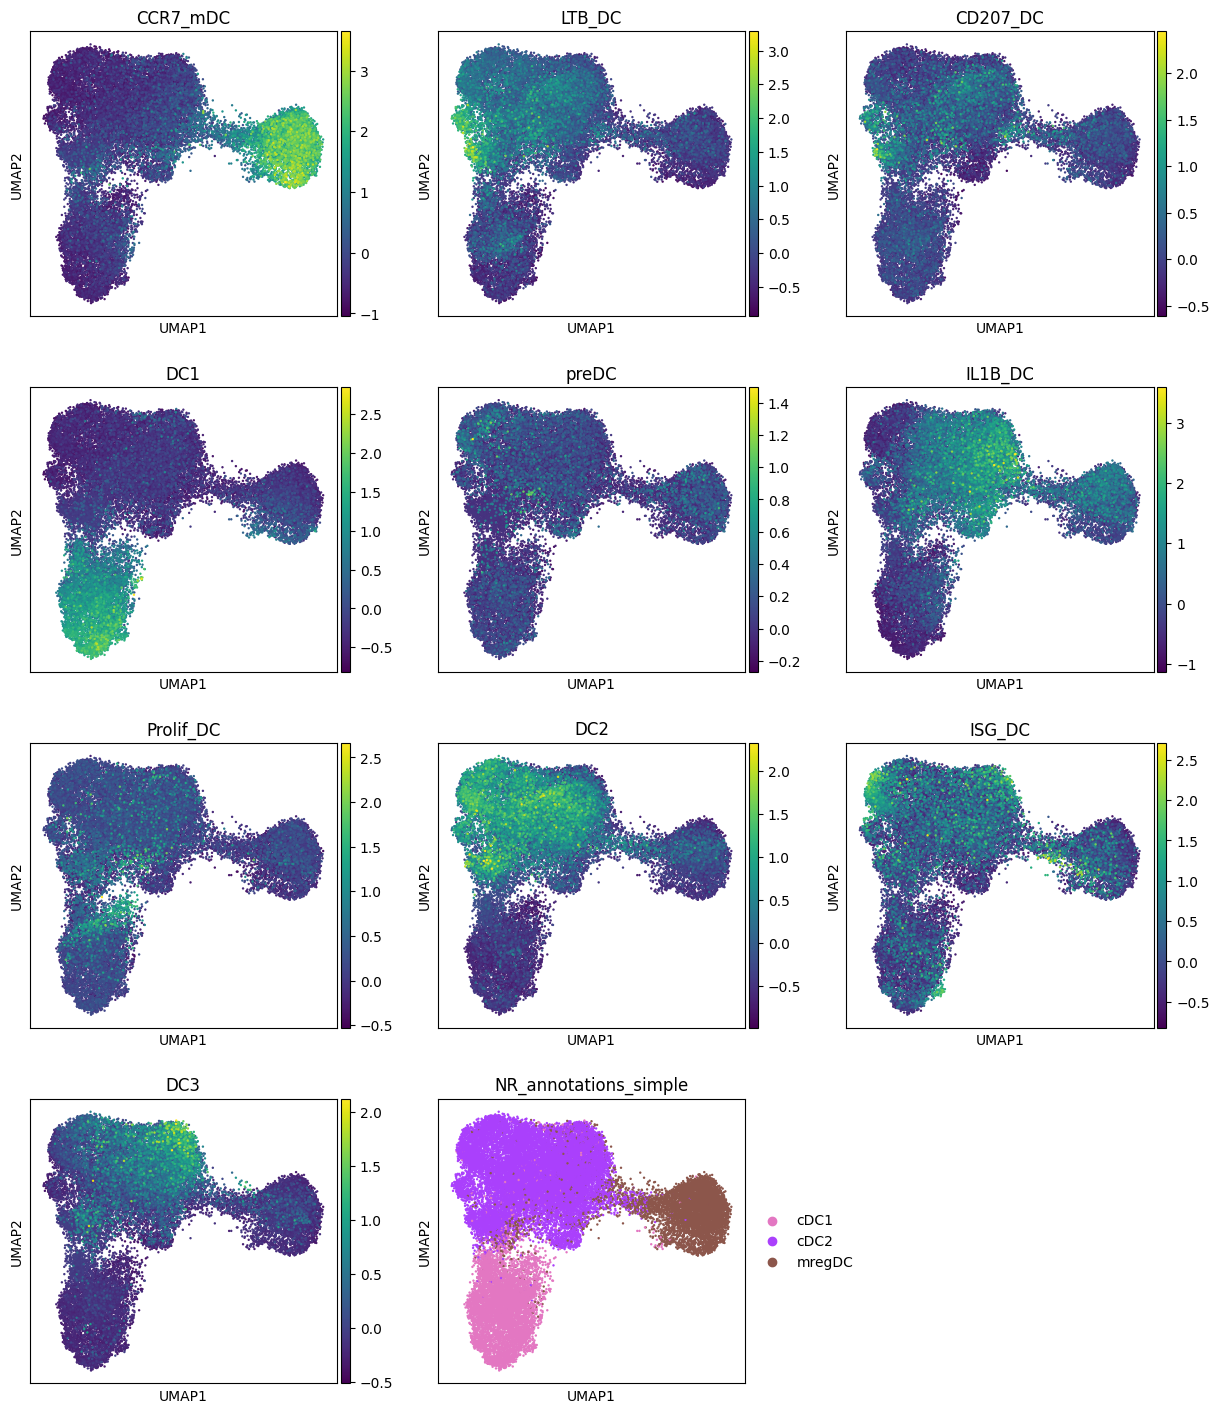

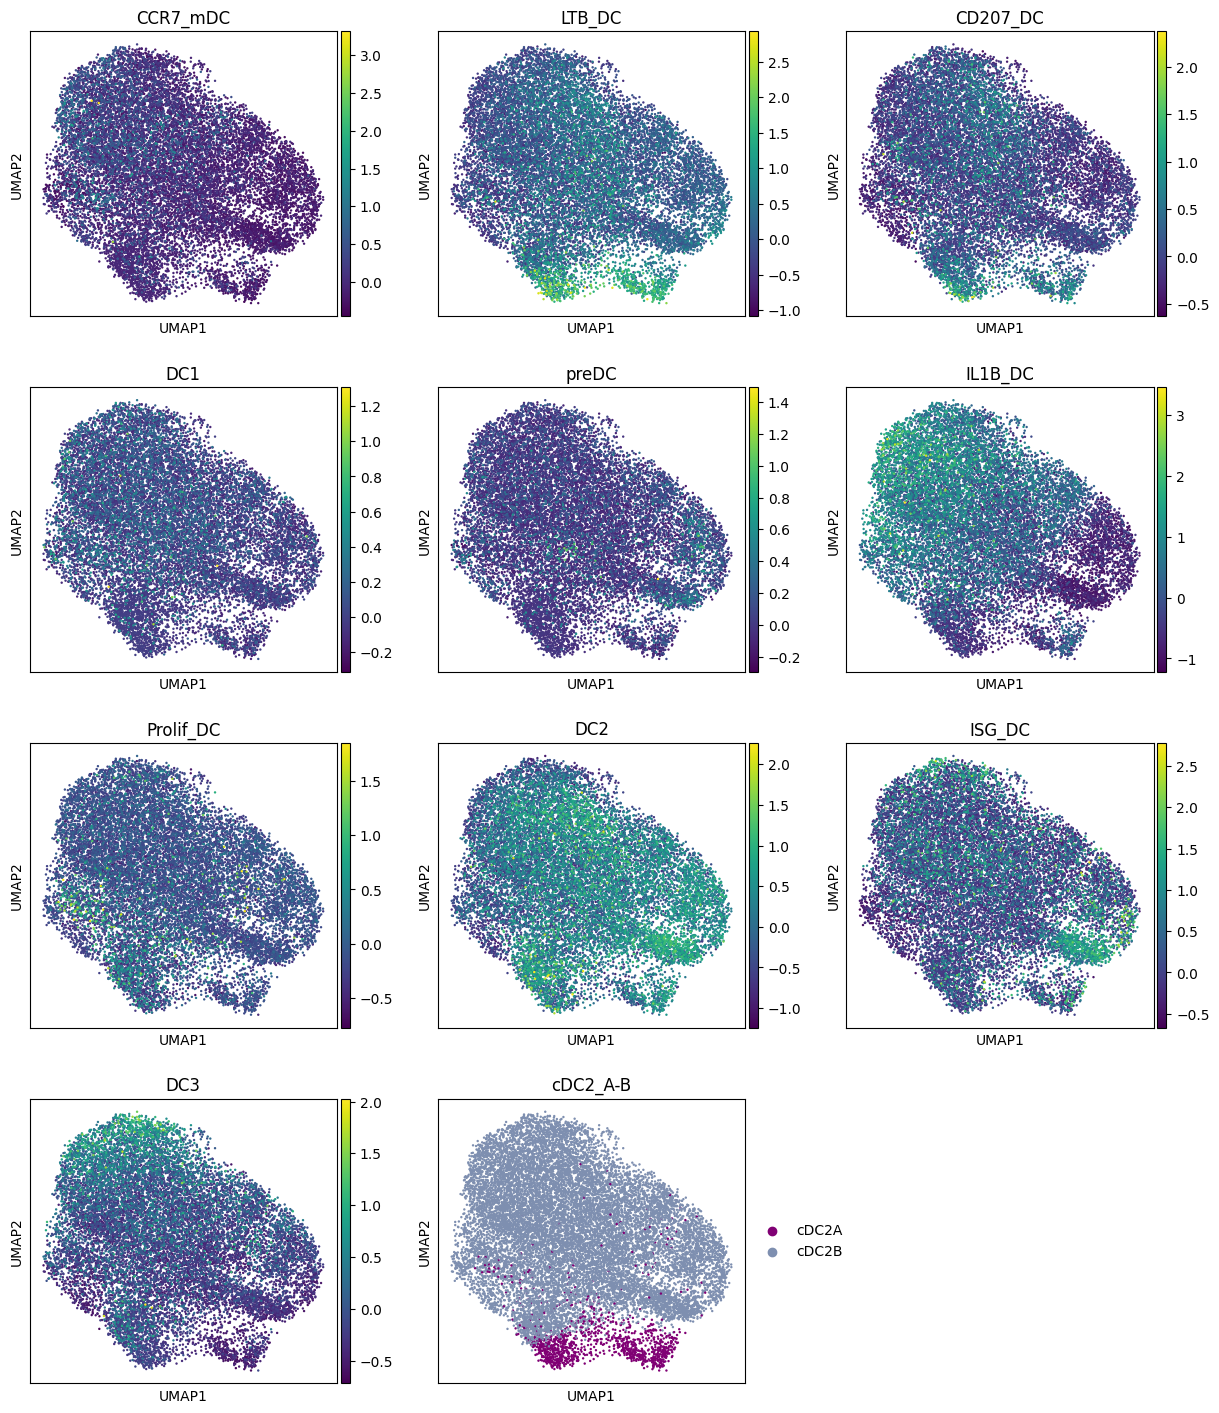

In [21]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars_1, ncols=3, size=12)
    sc.pl.umap(data_DC, color=colour_vars_2, ncols=3, size=12)
    sc.pl.umap(data_DC2, color=colour_vars_3, ncols=3, size=12)

# LC Sigs:

In [20]:
colour_vars_LC = ["CSF1R","CD207","CD1A"]


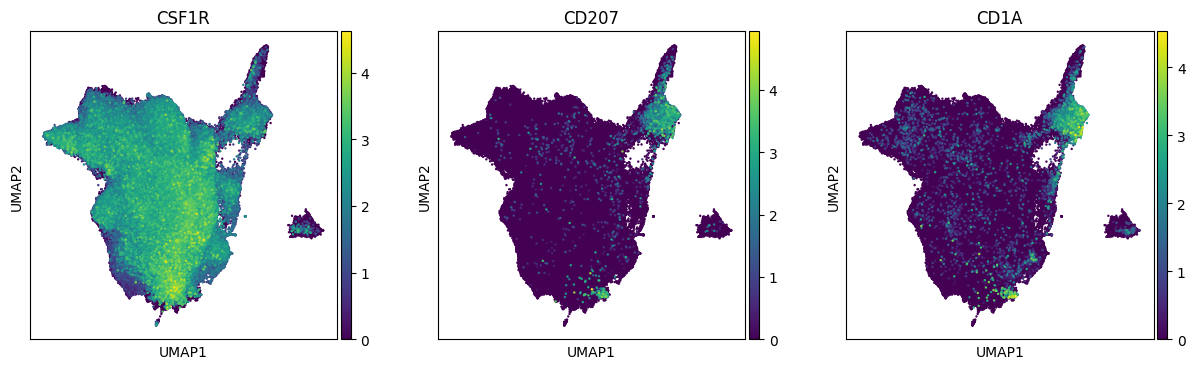

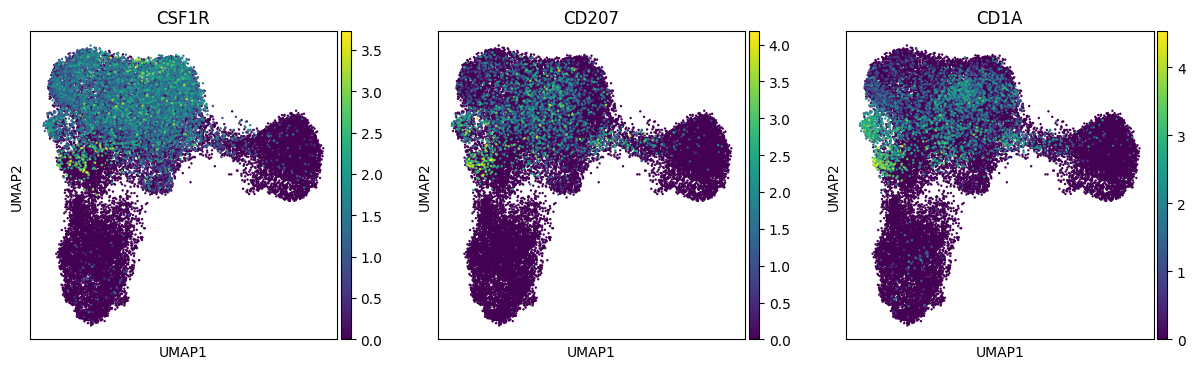

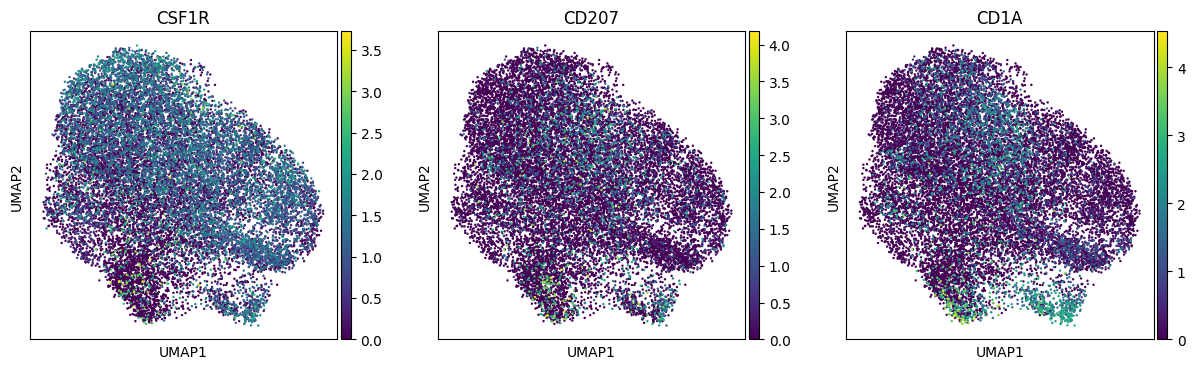

In [22]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars_LC, ncols=3, size=12)
    sc.pl.umap(data_DC, color=colour_vars_LC, ncols=3, size=12)
    sc.pl.umap(data_DC2, color=colour_vars_LC, ncols=3, size=12)

# Update following release of Mulder et al 2025 Nature Immuno --> overlaying full DEG list

In [4]:
LTB_DC = ['LTB','IL22RA2','LST1','TNFRSF13C','LINC01531','CEACAM1','ABI3','AAAS','PLAC8','SH3D21','PIK3R6','C1ORF162','FAM110A','CA2','TNNI2','RACK1','SUSD3','ABHD6','ACY3','CLEC4A','HIC1','CD3E','C11ORF31','C12ORF10','RPS3A','FAM107B','RPS4X','PFDN5','C6ORF48','ADA','CDH17','CTD-2006K23.1','C14ORF2','CORO1A','LINC00877','C19ORF43','LYST','PLD4','SMAGP','RPSA','45901','RPS6KA4','C10ORF54','RPS19','C9ORF16','SNAP29','RPL23A','HES4','C14ORF166','EVA1B','DDIT4','FCMR','CDH1','PAK1','C11ORF58','FXYD5','COTL1','MYL12A','PLVAP','C4ORF3','RPL3','JAML','SH3YL1','RPS5','RPL10A','RPL19','CFP','GHRL','C19ORF60','VASP','RPS23','ITGB7','DNAJC4','CHAF1A','C19ORF53','CD52','RPS27A','RPS6','PSTPIP2','RPL15','COMMD6','ENTPD1','KCNMB1','RPS14','RPS3','TSC22D3','FAM26F','CXORF21','RPL13A','RPL13','RPL7A','FAM65B','TLR10','ARHGAP9','GNGT2','UCP2','RPL6','TMEM8B','RPL7','RPS2','SLC38A1','SFTPD','RPL4','ITM2C','MYL9','C8ORF59','RPL5','TBC1D10C','RPL9','NPM1','STK11IP','ITGAX','RPS12','SPATS2L','RUNX3','C19ORF70','NCF1','RPL18','CLN8','RGS19','ARPC3','RPL26','BCL7C','LILRB1','LRRC25','SLC25A5','METTL26','VCAM1','C9ORF142','RPS15A','PTPN6','RPL8','SCLT1','RPS13','S100B','CCNG2','HINT1','SCPEP1','HHEX','RPL14','NACA','TMEM14C','RP11-596C23.2','GDI2','RAC2','RPL34','PDLIM2','IGFBP6','LDHB','C7ORF73','HCK','RPL11','USF2','SMIM14','DENND5B','ERP29','GSTP1','SPNS3','POLB','C17ORF62','FDFT1','RPL27A','LSP1','GABARAPL2','EEF1A1','C1ORF56','PIK3AP1','IKBKB','RPS25','COPS9','LBH','LSM10','UBE2E2','RPS15','MCCC1','RPL31','RPL29','PKIB','TBC1D9','CYFIP2','AFF3','FAM89B','RPL10','HTRA2','STK40','CD79A','RPS7','SP140','UNC119','HNRNPA1','RPL12','OFD1','RPL30','MT-ND4','EEF1B2','POLR3K','ANAPC16','LPXN','RPL32','EEF2','UFC1','OAZ2','HSH2D','LGALS2','SIGLEC10','NHLRC3','ACAA1','NDUFS8','RAB33A','GEM','MT-CO1','C1QBP','DOK1','PYCARD','INPP4A','RNASET2','MT-CO2','ASCC2','TSEN54','LY86','TMEM14B','CD48','ATP5L','PIGR','LIMD2','RPS24','ASB2','RPL27','CCDC50','PRDX5','RPLP2','PRR13','CD300A','RELT','PRELID1','RPS9','UBA52','SMDT1','IFNGR1','RHOH','GLTSCR2','RPS8','EIF3L','PIK3CD','ALDOC','RPS18','RPS20','GCA','RTFDC1','EIF3M','RPL18A','PTMS','45909','RPL24','STK17A','CYB5B','MSI2','PABPC1','PLEKHO1','RPL41','GPR82','TCIRG1','BID','CPPED1','U2AF1L4','SESN1','DEGS1','SLC25A6','ADGRE5','ACAP1','STK17B','RPL28','GPSM3','GSN','CCDC57','GTF2IRD1','MBOAT7','TIGAR','AKNA','PNISR','TMC8','RPL35A','ARHGAP5','RPL21','EIF3F','CSK','APBB1IP','FBL','EIF3E','TCTN3','POU2F2','EIF4A2','CCDC12','DBNL','ACTR3','REC8','SLC20A1','CTNND1','NBEAL1','CIB1','ARPC5','LCP1','ARPC1B','ELMO1','NKG7','45906','ERCC1','FGR','UQCRB','HMGN1','MPC2','SYNGR2','C12orf75','SMCO4','MYCBP2','IL18','SPIB','TMEM97','PMAIP1','PPP1R14A','FAM53C','CD1A','PRMT9','HERPUD1','GAS5','CD69']
CD207_DC = ['HLA-DQB2','FCGBP','CD207','CD1A','S100B','TACSTD2','PLEK2','KRT14','HPGDS','HSPA1A','FCER1A','CLDN1','LMNA','LTB','PPM1N','NDRG2','SLC18A2','HLA-DQA2','PKIB','TRPM4','KRT1','C15orf48','CA2','IGLC3','RGS2','GLRX','GNA15','GSN','SERPINF1','PRDX1','IL22RA2','CD59','HSPA6','DSP','DMKN','PTMS','DNAJB1','CSF1R','TUBA1B','KRT10','ALOX5AP','SUCNR1','TMEM14C','NRN1','TBC1D4','S100A4','RGS1','PTGS2','RGS16','JUN','LST1','VASP','HSP90AB1','GTF2IRD1','FILIP1L','CLEC5A','DUSP2','NR4A2','CCND2','QPRT','KRT5','EPCAM','NGFRAP1','CD1E','MSI2','CHAD','FAM46A','IL18','HSP90AA1','DBI','ALOX5','RP11-597D13.8','SLC29A1','TNF','OLFM2','GAS2L3','YWHAH','CKLF','PARM1','HLA-DRB5','MMP9','PERP','RHEB','CTNNBIP1','PPP1R15A','KRTDAP','TSC22D1','CAPG','AKR1A1','CFAP73','ACOT7','RXRA','C6orf48','BAIAP2','RNF5','FFAR4','MT-RNR2','RASGEF1B','CTNND1','SPAG9','SLC38A1','CDH1','IER5','AMD1','ASPH','CLTB','SUSD3','CD69','CD83','PTGS1','PRKCB','NUDT1','FLT1','HSPA1B','MAFF','EIF4A3','GNAI1','PXDC1','SFN','REEP5','HPGD','HSPH1','DNAJB9','WBP5','EMP1','FAM109A','NR4A1','CYSTM1','SH3YL1','GLA','PRKAR2B','LTC4S','RUNX3','C11orf31','CCR6','CXCL14','UBE2E1','ANXA5','EPB41L2','PDXK','ARL6IP5','TRA2B','BCO2','LINC01420','GADD45A','FHL2','TJP1','SLA','FRMD4B','CBR3','SLC2A1','TMEM14B','LCP1','MGST3','ABL2','IFRD1','TUBB2A','CYSLTR1','DNAJA1','ALCAM','KCNMB1','HSPA5','ING2','LPAR3','OGFRL1','RAPH1','KRT15','KDSR','PDLIM7','PLPP1','PPP1R10','DDAH2','SPTY2D1','CARD9','COPRS','RAPGEF4','RHOC','MT-ND2','GDI2','TCEAL4','CITED2','LY6D','P2RY13','RTN3','BTG3','NME4','PTGER3','RNF24','PPIF','INTS6','RALA','TMEM97','CKS2','LDHA','HCAR2','CYB5R1','ICAM3','NEU1','HN1','SLC38A2','FFAR2','VIM','ZNF331','EGR3','HLA-DQB1','DNAJB6','HIP1','NAALADL1','OSBPL8','SH3BGRL','ABCC3','MTDH','SLC8A1','ZC3H12A','TSPAN13','LGALS1','PRMT9','CSRNP1','ANXA3','S100A2','DNAJB4','PDLIM2','CD9','RGS12','HSPA2','PVRL2','AHCYL1','RPSA','SNHG8','DSTN','DOCK4','GADD45B','SELK','CXADR','MTRNR2L12','RAB5A','MAP2K1','G3BP2','RANBP2','GNAI2','H2AFY','RLF','STMN1','GOLGB1','NFKBIE','FNDC4','CD52','RNF125','HMGB1','RAB32','TRPC6','NT5C','C20orf24','PGK1','ATF4','OTUD6B-AS1','PRDX4','MT-ND4','THAP9-AS1','ARMCX3','CD63','WDFY2','CTA-29F11.1','RAC1','HHEX','H3F3B','S100A10','NDFIP1','ST14','ACAP1','RPS20','PHYHIP','ATP6AP2','S100A14','PGM2L1','GNB2L1','SMPDL3B','CMTM7','ORMDL3','CTSH','SPN','S100A7','H2AFZ','PPFIBP1','H2AFV','ITGB7','MAP4','HSD17B12','ARHGEF35','GNAO1','KDM5B','FAM53C','CDC42EP3','SOD1','PYCR1','MYO6','TOR1AIP2','DUSP10','ACOX1','PRMT7','HLA-DQA1','IL1R1','PFDN2','PLAU','MT-ATP6','ARL4D','GNL3','OCIAD2','FKBP11','AKAP9','RASA2','SORT1','MCOLN2','CPED1','MAP1LC3B','TACC1','PAK1','SVIP','MKNK1','ID3','PKM','ZFP36L1','FUS','ADCY7','BRD2','HSPE1','RTFDC1','ENTPD1','SPINT1','IL1RAP','RBPJ','CACYBP','TIPARP','PHTF1','UBC','RPL15','PTPN6','RRAGA','NAA10','SPI1','CALR','SH2D4A','DNAJB11','LAGE3','TXNIP','SBDS','KLHDC3','TWISTNB','TMEM106B','RWDD1','DHRS9','SCN9A','GLIPR2','CD164','RSRP1','RCN3','SNX8','EIF4G2','ATP5J','HINT1','PCYT1A','CAMK1D','HLA-DMB','CST6','PLP2','ERCC1','OSTC','STK17A','CLDND1','TAP2','EML4','CSRP2','ENG','HCK','MT-CYB','CCDC186','RSBN1','DEF6','NECAP2','HLA-DRB1','CDYL','CCNI','UBE2E3','GPR82','MYC','HPRT1','PA2G4','WAPL','CIRBP','HNRNPDL','RAB3GAP1','SFTPD','LAPTM4A','CD109','GNG2','GNG11','SKIL','NCF2','ALDOA','C12orf57','FKBPL','PAK2','TAX1BP1','TRIP6','DDX24','B3GNT5','JMY','RP1-313I6.12','CYLD','TNFAIP8L3','DNAJC10','PLCG2','PALD1','MYO1D','EPB41L4A-AS1','CALML5','HNRNPA2B1','EFNB3','IVNS1ABP','AQP3','ACSL4','ELAVL4','IDI1','BAZ2B','MAPRE1','NCL','CCDC107','HEXIM1','GTF2I','CSNK2B','CORO1C','KCTD5','LMO4','FNBP1L','CACNA1G','TTC19','ARHGAP31','HMOX2','ZNF385A','GALM','ZNF721','ZFHX3','YME1L1','SEC63','ARL6IP4','MID1IP1','NKRF','TRAF4','CARD19','44446','PDIA3','ZNF33A','CAP1','NR4A3','ARHGAP18','PPP1R12A','COMMD4','GPBP1','MOB3B','CREB5','EXOC6','CCL4L2','MT-ND5','DYNLT3','TAF7','SMAGP','KCTD17','LSR','RPS19BP1','C16orf87','DYNLL1','TUBB','S100A11','ATPAF2','DUSP3','GLIPR1','MTSS1','MT-ND1','CXorf21','ABCC4','FKBP4','NIN','CYBB','MMP14','FXYD3','NEIL1','DCTPP1','CALM1','CD86','FAM162A','TIGAR','RASSF7','RPS4Y1','SENP6','NXT1','ARID4A','SLC4A7','HSPB1','ENO2','QSOX1','ZFP36','ENY2','COL21A1','HMGN5','CHD2','TSPO','PTGES3','CD2','PPM1J','CHMP2B','IL2RG','TPI1','UCHL3','FAM105A','DRAP1','CLIC1','PEA15','BTK','F11R','KMT2E','INSIG2','AIF1','ACBD6','OTULIN','SMYD3','GPR183','SCPEP1','UTS2','PRR14','MYL9','MBP','C14orf166','HOOK3','UTP6','KIF21A','SERTAD2','BTG2','TAPT1','CLOCK','MLEC','DOK1','RSBN1L','DDX46','SNAPC4','CREB3L2','AP2M1','MT-ND3','SMIM22','CAMLG','MIF','CHD1','WHSC1L1','RAB21','RP3-460G2.2','COCH','PPIL4','RPL14','UAP1','SCARF1','IGSF6','JMJD6','ATPIF1','DYNC1H1','ANXA11','TERF2IP','MTA3','RGS14','DUT','PTPN12','CDIP1','CCDC170','MPST','SPTSSA','CYFIP2','ANKH','TMEM70','COL9A2','TBC1D12','RARA','TRIP10','PTTG1','MAP1LC3A','ARMCX6','DR1','P4HA1','PPP1R2','MIR222HG','TMF1','LGALS7B','FUT8','ARPC3','EI24','DENR','GNGT2','MT-CO3','CD276','PDE4A','MTMR12','PRPF38B','KBTBD8','RBM3','XPC','GLUD1','C1orf115','CDH20','UQCRB','GPR137B','MANF','NUCKS1','TRIM13','PEBP1','EIF1AX']

In [5]:
# Define dictionary of gene sets
gene_sets = {
    "LTB_DC": LTB_DC,
    "CD207_DC": CD207_DC,
}

In [6]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

       'CTD-2006K23.1', 'C14ORF2', 'C19ORF43', '45901', 'C10ORF54', 'C9ORF16',
       'C14ORF166', 'FCMR', 'C11ORF58', 'C4ORF3', 'JAML', 'C19ORF60',
       'C19ORF53', 'FAM26F', 'CXORF21', 'FAM65B', 'C8ORF59', 'C19ORF70',
       'METTL26', 'C9ORF142', 'RP11-596C23.2', 'C7ORF73', 'C17ORF62',
       'C1ORF56', 'COPS9', 'ATP5L', 'GLTSCR2', 'RTFDC1', '45909', 'ADGRE5',
       'TIGAR', '45906', 'PRMT9', 'GAS5'],
      dtype='object')


       'CFAP73', 'C6orf48', 'MT-RNR2', 'WBP5', 'FAM109A', 'C11orf31',
       'LINC01420', 'PLPP1', 'HN1', 'PRMT9', 'PVRL2', 'SELK', 'C20orf24',
       'OTUD6B-AS1', 'THAP9-AS1', 'CTA-29F11.1', 'GNB2L1', 'RTFDC1', 'RSRP1',
       'ATP5J', 'CCDC186', 'WAPL', 'RP1-313I6.12', 'CARD19', '44446', 'TIGAR',
       'FAM105A', 'OTULIN', 'C14orf166', 'WHSC1L1', 'RP3-460G2.2', 'ATPIF1',
       'MIR222HG', 'PDE4A'],
      dtype='object')


In [11]:
colour_vars_3 = ["LTB_DC","CD207_DC","cDC2_A-B","cDC2_Atlas_Subclusters"]

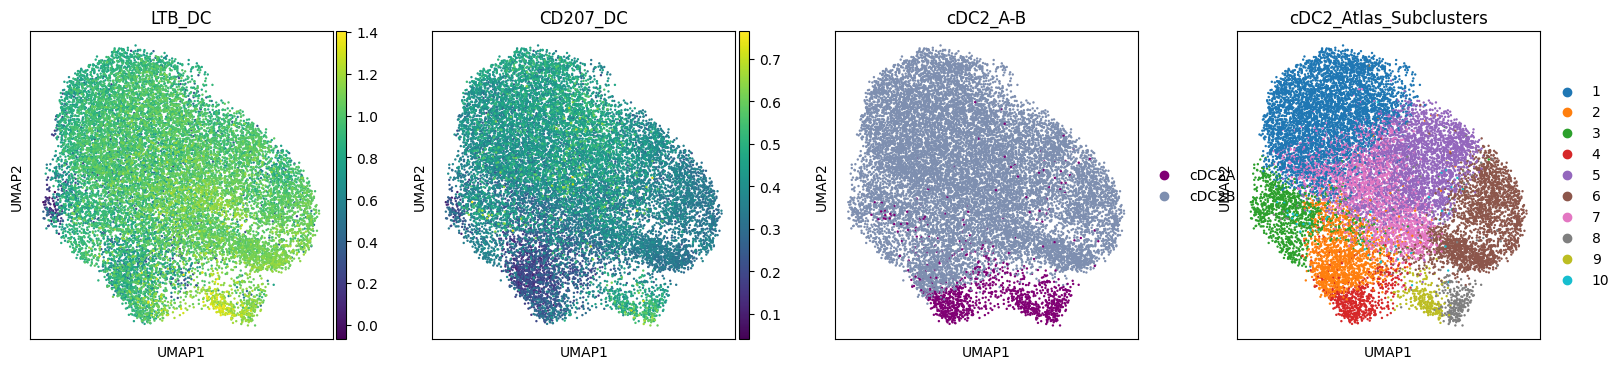

In [12]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC2, color=colour_vars_3, ncols=4, size=12)

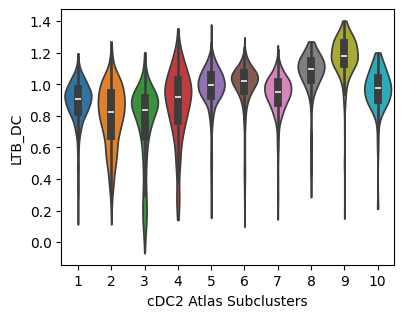

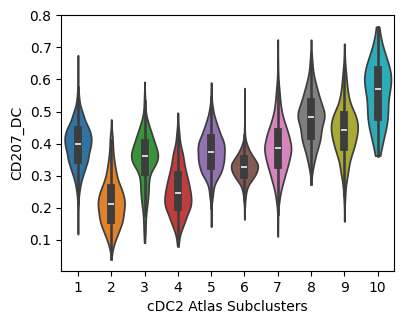

In [14]:
with plt.rc_context({"figure.figsize": (4.5, 3.5)}):
    for gene in gene_sets.keys():
        sc.pl.violin(
            data_DC2,
            keys=gene,
            groupby='cDC2_Atlas_Subclusters',
            stripplot=False,
            inner='box',
            show=True,
        )

In [10]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

In [15]:
# take top 10 genes
LTB_DC = ['LTB','IL22RA2','LST1','TNFRSF13C','LINC01531','CEACAM1','ABI3','AAAS','PLAC8','SH3D21']
CD207_DC = ['HLA-DQB2','FCGBP','CD207','CD1A','S100B','TACSTD2','PLEK2','KRT14','HPGDS','HSPA1A']

In [16]:
# Define dictionary of gene sets
gene_sets = {
    "LTB_DC": LTB_DC,
    "CD207_DC": CD207_DC,
}

In [17]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [18]:
colour_vars_3 = ["LTB_DC","CD207_DC","cDC2_A-B","cDC2_Atlas_Subclusters"]

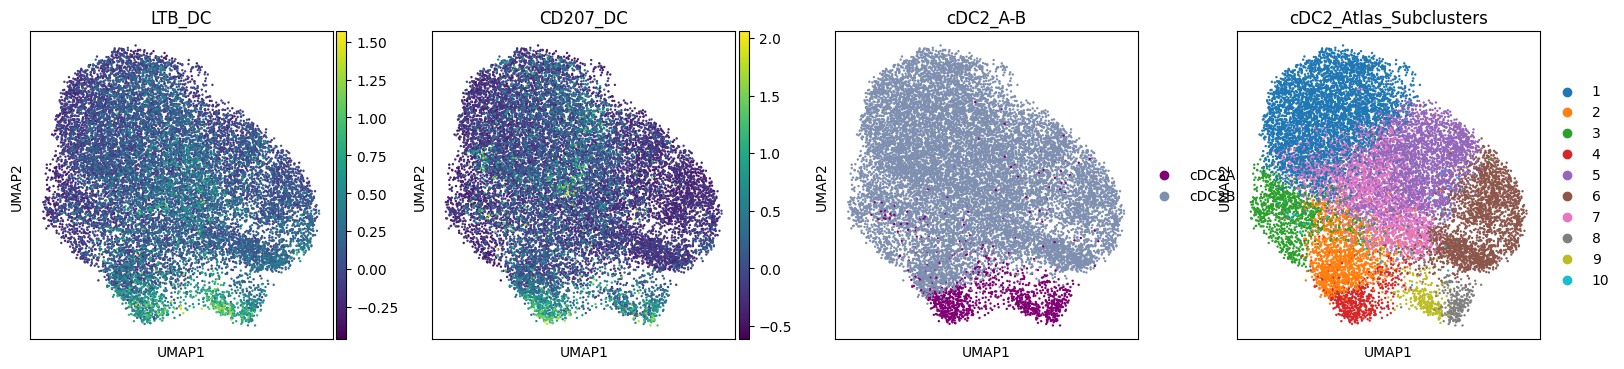

In [19]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC2, color=colour_vars_3, ncols=4, size=12)

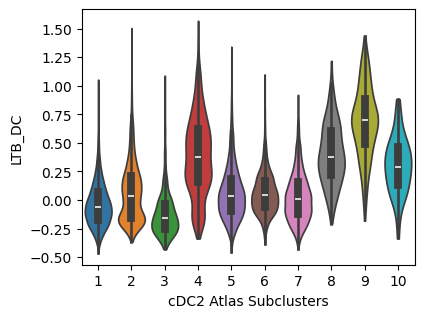

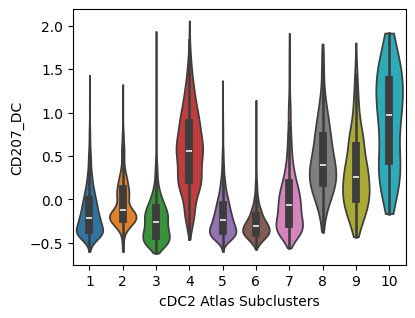

In [20]:
with plt.rc_context({"figure.figsize": (4.5, 3.5)}):
    for gene in gene_sets.keys():
        sc.pl.violin(
            data_DC2,
            keys=gene,
            groupby='cDC2_Atlas_Subclusters',
            stripplot=False,
            inner='box',
            show=True,
        )